Todos os exercícios a seguir devem ser realizados usando a base de
dados Housing Prices (Housing Prices Dataset | Kaggle). Não podem ser
utilizadas bibliotecas além da pandas, numpy e matplotlib. A variável
price é a variável alvo e as demais variáveis são as preditivas.

# Configuração do Ambiente.

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from typing import Tuple, List
from collections.abc import Iterable

In [50]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 1. Implemente o One-Hot-Encoding para as variáveis categóricas.

In [51]:
def one_hot_encoding(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aplica o One-Hot-Encoding para as variáveis categóricas do DataFrame.
    Args:
        df (pd.DataFrame): DataFrame contendo as variáveis categóricas.
    Returns:
        pd.DataFrame: DataFrame com as variáveis categóricas codificadas usando o One-Hot-Encoding.
    """
    # Tipos de colunas numéricas.
    num_types: List[str] = ['int64', 'int32', 'float64', 'float32', 'uint8',
                        'uint16', 'uint32', 'uint64', 'complex128', 'complex64']
    df_encoded = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in num_types:
            # Adiciona as colunas numéricas sem alterações.
            df_encoded[column] = df[column]
        else:  # Aplica o One Hot Encoding nas categóricas.
            values = df[column].unique()
            for value in values:
                df_encoded[f'{column}_{value}'] = (df[column] == value).astype(int)

    return df_encoded

In [52]:
df_encoded = one_hot_encoding(df)

In [53]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,1,0,1,...,1,0,1,0,2,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,1,0,1,...,1,0,1,0,3,0,1,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,0,0,1,2,1,0,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,0,...,1,0,1,0,3,1,0,1,0,0
4,11410000,7420,4,1,2,1,0,0,1,0,...,1,0,1,0,2,0,1,1,0,0


# 2. Separe o conjunto de dados em treino e teste.

In [54]:
 def train_test_split(df: pd.DataFrame, test_size: float = 0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Separa o conjunto de dados em treino e teste.
    Args:
        df (pd.DataFrame): DataFrame contendo os dados.
        test_size (float): Proporção do conjunto de dados que será usada para teste.
    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Conjunto de dados de treino e teste.
    """
    # Embaralha o DataFrame pegando uma amostra de 100% dele mesmo.
    df = df.sample(frac=1).reset_index(drop=True)
    # Separa o conjunto de dados em treino e teste
    test_size = int(df.shape[0] * test_size)
    test = df[:test_size]
    train = df[test_size:].reset_index(drop=True)

    return train, test

In [55]:
train, test = train_test_split(df_encoded)

In [56]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,3780000,2856,3,1,3,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,5950000,7320,4,2,2,1,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
2,3290000,3480,4,1,2,0,1,1,0,1,...,1,0,0,1,1,0,1,0,1,0
3,4543000,4100,2,2,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,2520000,3000,2,1,2,1,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0


In [57]:
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,3675000,3600,2,1,1,1,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
1,8400000,8875,3,1,1,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
2,3493000,4900,3,1,2,0,1,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,4970000,4410,4,3,2,1,0,1,0,0,...,1,0,0,1,2,0,1,0,1,0
4,4340000,4500,3,2,3,1,0,1,0,1,...,0,1,0,1,1,0,1,1,0,0


# 3.

## a) Implemente a regressão linear ao conjunto de dados usando o método dos mínimos quadrados (OLS).

### Univariada

In [58]:
def regressao_linear(X: Iterable, y: Iterable) -> Tuple[float, float]:
    X = np.array(X)
    y = np.array(y)

    sum_xy = np.sum(X * y)
    sum_x2 = np.sum(X * X)
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    # Fórmula dos slides da aula.
    a: float = sum_xy / sum_x2
    # Fórmula encontrada na literatura.
    b: float = mean_y - a * mean_x

    return a, b

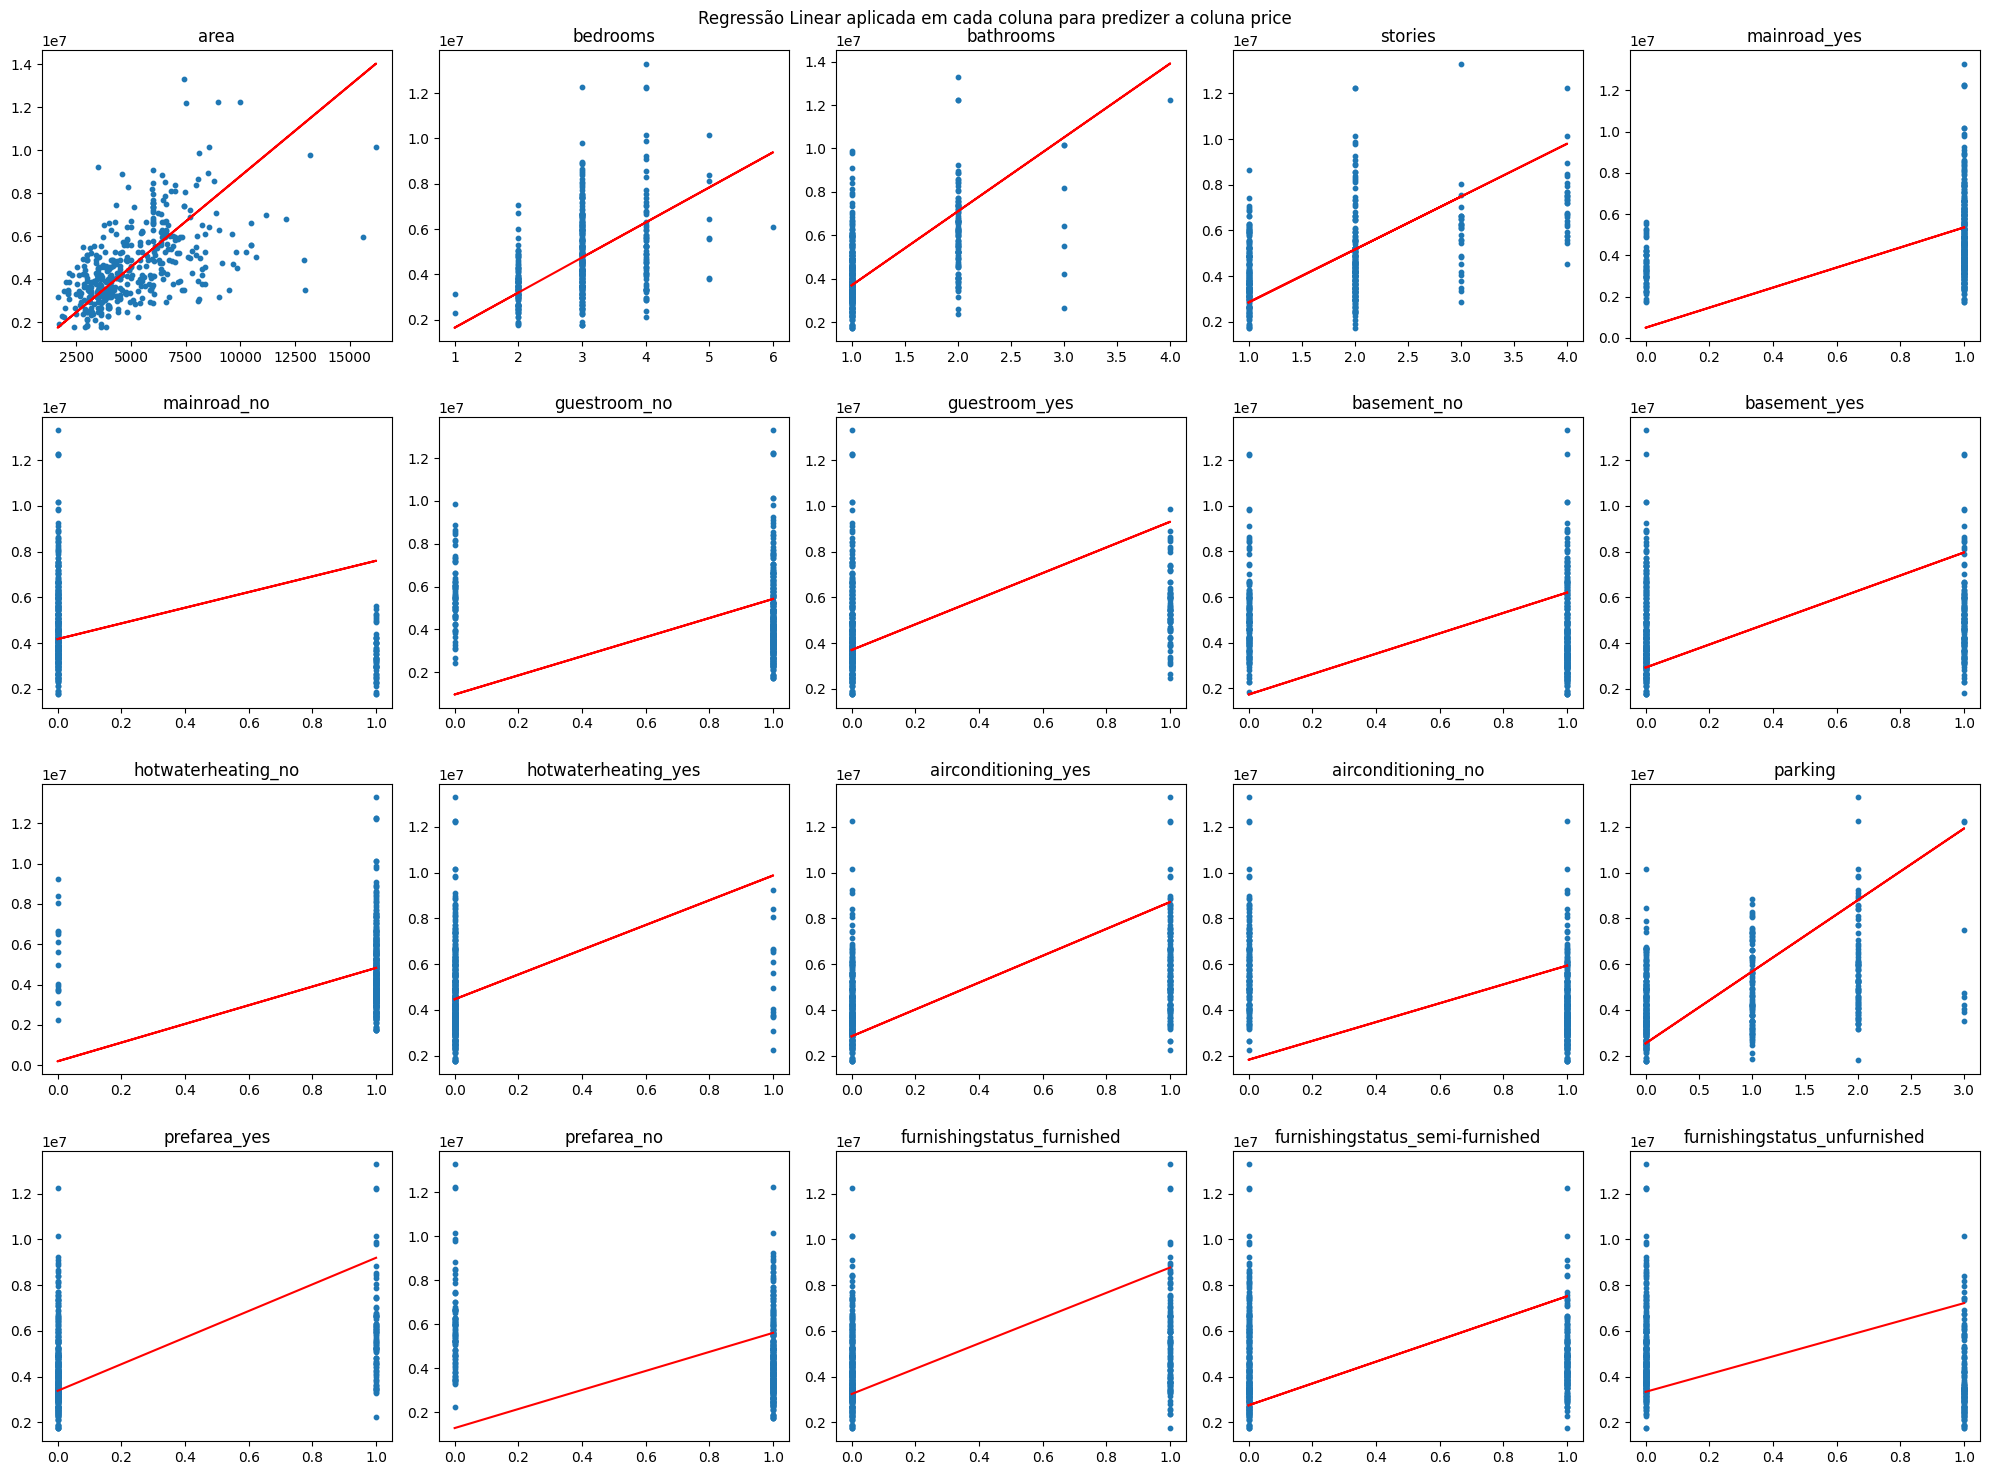

In [59]:
target = 'price'
columns = [column for column in train.columns if column != target]

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten()
for i, column in enumerate(columns):
    X = train[column]
    y = train[target]
    a, b = regressao_linear(X, y)
    y_pred = a * X + b

    axes[i].scatter(X, y, s=10)
    axes[i].plot(X, y_pred, color='red')
    axes[i].set_title(column)

plt.suptitle('Regressão Linear aplicada em cada coluna para predizer a coluna price')
plt.tight_layout()
plt.show()

### Multivariada

In [60]:
def regressao_linear_multivariada(df: pd.DataFrame, target: str) -> float:

    y = df[target].values
    X = df.drop(target, axis=1).values

    Xt = X.T
    XtX = Xt.dot(X)
    XtX_inv = np.linalg.inv(XtX)
    Xt_y = Xt.dot(y)
    w = XtX_inv.dot(Xt_y)

    return w

In [61]:
w = regressao_linear_multivariada(train, 'price')
w

array([-2.97982464e+03, -4.93946181e+06, -1.03535938e+07,  6.46002244e+06,
       -1.60418993e+21, -1.60418993e+21, -3.60427670e+21, -3.60427670e+21,
        7.47971577e+21,  7.47971577e+21, -5.42216151e+21, -5.42216151e+21,
        3.15091237e+21,  3.15091237e+21,  5.09278398e+05,  0.00000000e+00,
       -1.25829120e+07,  3.14572800e+06,  6.29145600e+06,  9.43718400e+06])

## b) Avalie o desempenho do modelo usando as métricas MSE e R² (você deve implementar essas métricas)

In [62]:
def mse(y: Iterable, y_pred: Iterable) -> float:

    y = np.array(y)
    y_pred = np.array(y_pred)

    mse = sum((y - y_pred)**2) / len(y)

    return mse

In [63]:
def r2(y: Iterable, y_pred: Iterable) -> float:

    y = np.array(y)
    y_pred = np.array(y_pred)
    mean_y = np.mean(y)

    sst = sum((y - y_pred)**2)
    ssr = sum((y_pred - mean_y)**2)
    r2 = 1 - sst/ssr

    return r2

### Univariada

In [64]:
target = 'price'
columns = [column for column in train.columns if column != target]
y = test[target]
resultados = pd.DataFrame(columns=['Coluna', 'MSE', 'R²'])

for column in columns:
    a, b = regressao_linear(train[column], train[target])
    y_pred = a * test[column] + b
    resultados.loc[len(resultados)] = [column, mse(y, y_pred), r2(y, y_pred)]

resultados

,Coluna,MSE,R²
0,area,4.018951e+12,-0.075446
1,bedrooms,4.433488e+12,-1.620386
2,bathrooms,3.620633e+12,-0.097613
3,stories,5.997351e+12,-0.244480
4,mainroad_yes,4.621108e+12,-0.504970
5,mainroad_no,7.578743e+12,-3.474134
6,guestroom_no,9.975262e+12,-1.729591
7,guestroom_yes,6.495482e+12,-0.249690
8,basement_no,1.196944e+13,-1.330635
9,basement_yes,7.088759e+12,-0.165370


### Multivariada

In [65]:
y = test['price']
y_pred = test.drop('price', axis=1).dot(w)

In [66]:
mse(y, y_pred)

563301230561914.1

In [67]:
r2(y, y_pred)

-0.030597452269619074

# 4.

## a) Implemente a regressão linear ao conjunto de dados usando o método do gradiente descendente (GD). Plote a curva de aprendizagem.

In [195]:
def regressao_linear_gd(df: pd.DataFrame, target: str, alpha: float = 0.001, epochs: int = 1000):

    # Separa as features do target.
    y = df[target].values
    X = df.drop(target, axis=1).values

    w0 = 10  # Termo independente
    w = np.ones(X.shape[1])  # Coeficientes.
    EQM = list()  # Erro Quadrado Médio por época.

    for _ in range(epochs):
        acc = 0  # Soma do erro quadrático.
        sum_w0 = 0  # Gradiente do termo independente.
        sum_w = np.zeros(X.shape[1])  # Gradiente dos coeficientes.

        for x_i, y_i in zip(X, y):
            erro = y_i - (np.dot(w, x_i) + w0)
            sumw0 += erro
            sum_w += erro * x_i
            acc += erro**2
        # Atualização dos pesos.
        w0 += (alpha * sumw0) / X.shape[0]
        w  += (alpha * sum_w) / X.shape[0]
        # Listagem do erro quadrático médio.
        EQM.append(acc / X.shape[0])

    return EQM, w0, w

In [210]:
eqm, w0, w = regressao_linear_gd(train, 'price', epochs=30)

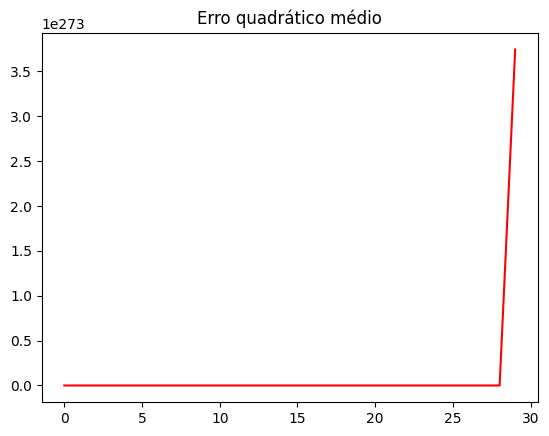

In [211]:
plt.plot(eqm, color='red')
plt.title('Erro quadrático médio')
plt.show()

A coluna area contém valores bem discrepantes em relação as demais.
Então será um feito um teste sem esta coluna.

In [207]:
eqm, w0, w = regressao_linear_gd(train.drop('area', axis=1), 'price', epochs=150)

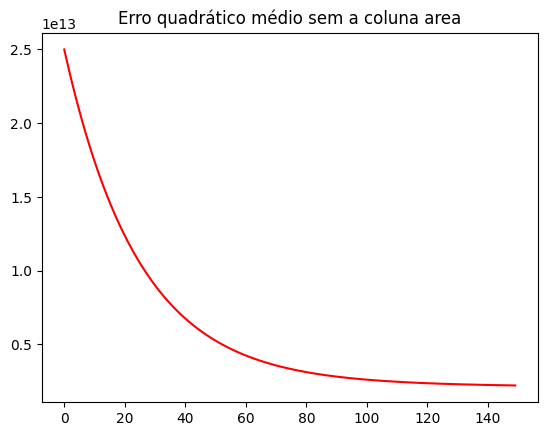

In [208]:
plt.plot(eqm, color='red')
plt.title('Erro quadrático médio sem a coluna area')
plt.show()

## b) Normalize as variáveis preditivas usando o método min-max e a variável alvo usando o método z-score. Repita o procedimento do item A.

## c) Avalie o desempenho do modelo aplicado ao conjunto de dados normalizados, usando as métricas MSE e R².

# 5. Repita os procedimentos realizados no item 4, usando o método SGD (gradiente descendente estocástico) ao invés do GD.

# 6. Treine 10 vezes o algoritmo GD, calculando o MSE e o R² sobre o conjunto de teste após cada iteração. Faça o mesmo com o algoritmo SGD. Faça um gráfico dos valores do MSE e R² para ambos os algoritmos. Compare esses valores com os obtidos com o método OLS. Por que esses valores variam tanto em cada treinamento? Você consegue propor uma mudança nesses algoritmos que melhore o desempenho?